- Standard scaler
- mean normalization
- minmax scaling
- maxAbsolutescaling
- Robust scaling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import datasets
reg = datasets.load_breast_cancer()

In [4]:
reg 

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
dir(reg)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
df = pd.DataFrame(data = reg.data ,columns =reg.feature_names)

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df['target'] = reg.target

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df = df[['mean radius','mean texture']]

In [11]:
df.head()

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


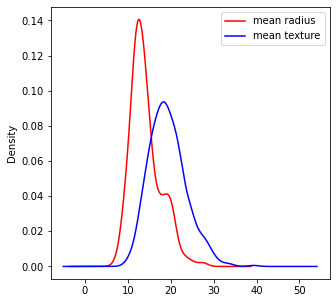

In [12]:
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)
df['mean radius'].plot(kind ='kde',ax = ax, color ='r',legend ='mean radius')
df['mean texture'].plot(kind = 'kde',ax =ax, color = 'b',legend = 'mean texture')
plt.legend(loc = 0)
plt.show()

standard scaler = (xi - mean/std)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
data_rescaled = sc.transform(df)

In [14]:
df.head()

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [15]:
df['mean radius'].mean()

14.127291739894563

In [16]:
sc.mean_ ## mean value for variable which u fitted

array([14.12729174, 19.28964851])

In [17]:
sc.scale_ ## std for variables which u fitted

array([3.52095076, 4.29725464])

In [18]:
data_rescaled

array([[ 1.09706398, -2.07333501],
       [ 1.82982061, -0.35363241],
       [ 1.57988811,  0.45618695],
       ...,
       [ 0.70228425,  2.0455738 ],
       [ 1.83834103,  2.33645719],
       [-1.80840125,  1.22179204]])

In [19]:
standard_data = pd.DataFrame(data = data_rescaled,columns = df.columns)

In [20]:
standard_data.head() 

,mean radius,mean texture
0,1.097064,-2.073335
1,1.829821,-0.353632
2,1.579888,0.456187
3,-0.768909,0.253732
4,1.750297,-1.151816


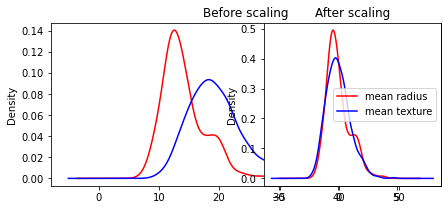

In [21]:
fig = plt.figure(figsize=(7,3))

ax1 = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title('Before scaling')
df['mean radius'].plot(kind ='kde',ax = ax1, color ='r',legend ='mean radius')
df['mean texture'].plot(kind = 'kde',ax =ax1, color = 'b',legend = 'mean texture')

ax2.set_title('After scaling')
standard_data['mean radius'].plot(kind = 'kde',ax =ax2, color = 'r',legend = 'mean radius')
standard_data['mean texture'].plot(kind ='kde',ax =ax2 , color = 'b',legend ='mean texture')

plt.legend(loc = 0)
plt.show()

## Mean normalization = xi -mean (x)/ max(x)-min(x)

In [22]:
df.head()

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [23]:
ranges =df.max(axis = 0) - df.min(axis=0)
ranges

mean radius     21.129
mean texture    29.570
dtype: float64

In [24]:
mean1 = df.mean()
mean1 

mean radius     14.127292
mean texture    19.289649
dtype: float64

In [25]:
mean_scaled =(df -mean1) / ranges

In [26]:
mean_scaled

,mean radius,mean texture
0,0.182815,-0.301307
1,0.304923,-0.051392
2,0.263274,0.066295
3,-0.128132,0.036874
4,0.291671,-0.167388
...,...,...
564,0.351778,0.104848
565,0.284098,0.303022
566,0.117029,0.297273
567,0.306342,0.339545


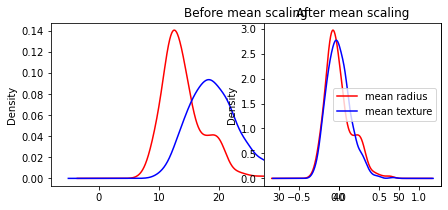

In [27]:
fig = plt.figure(figsize=(7,3))

ax1 = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title('Before mean scaling')
df['mean radius'].plot(kind ='kde',ax = ax1, color ='r',legend ='mean radius')
df['mean texture'].plot(kind = 'kde',ax =ax1, color = 'b',legend = 'mean texture')

ax2.set_title('After mean scaling')
mean_scaled['mean radius'].plot(kind = 'kde',ax =ax2, color = 'r',legend = 'mean radius')
mean_scaled['mean texture'].plot(kind ='kde',ax =ax2 , color = 'b',legend ='mean texture')

plt.legend(loc = 0)
plt.show()

## min_max_scaling = x -min(x)/ max(x) - min(x)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
min_max = MinMaxScaler()

In [32]:
min_max.fit(df)

MinMaxScaler()

In [33]:
min_max.data_max_

array([28.11, 39.28])

In [34]:
min_max.data_min_

array([6.981, 9.71 ])

In [35]:
min_max_scale = min_max.transform(df)

In [36]:
min_max_scale

array([[0.52103744, 0.0226581 ],
       [0.64314449, 0.27257355],
       [0.60149557, 0.3902604 ],
       ...,
       [0.45525108, 0.62123774],
       [0.64456434, 0.66351031],
       [0.03686876, 0.50152181]])

In [37]:
min_max_scale = pd.DataFrame(data = min_max_scale, columns = df.columns)

In [38]:
min_max_scale.head()

,mean radius,mean texture
0,0.521037,0.022658
1,0.643144,0.272574
2,0.601496,0.390260
3,0.210090,0.360839
4,0.629893,0.156578


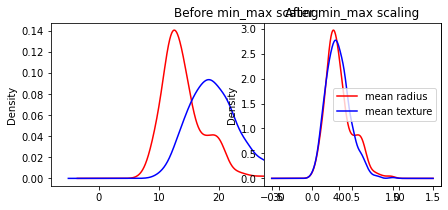

In [39]:
fig = plt.figure(figsize=(7,3))

ax1 = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title('Before min_max scaling')
df['mean radius'].plot(kind ='kde',ax = ax1, color ='r',legend ='mean radius')
df['mean texture'].plot(kind = 'kde',ax =ax1, color = 'b',legend = 'mean texture')

ax2.set_title('After min_max scaling')
min_max_scale['mean radius'].plot(kind = 'kde',ax =ax2, color = 'r',legend = 'mean radius')
min_max_scale['mean texture'].plot(kind ='kde',ax =ax2 , color = 'b',legend ='mean texture')

plt.legend(loc = 0)
plt.show()

max_absolute_scaling = xi/max(|x|)

In [42]:
from sklearn.preprocessing import MaxAbsScaler

In [43]:
max_ = MaxAbsScaler()

In [44]:
max_.fit(df)

MaxAbsScaler()

In [46]:
max_.transform(df)

array([[0.63998577, 0.26425662],
       [0.73176805, 0.45239308],
       [0.70046247, 0.54098778],
       ...,
       [0.59053718, 0.71486762],
       [0.73283529, 0.74669043],
       [0.27605834, 0.62474542]])

In [47]:
abs_trans = pd.DataFrame(data = max_.transform(df), columns =df.columns)

In [48]:
abs_trans

,mean radius,mean texture
0,0.639986,0.264257
1,0.731768,0.452393
2,0.700462,0.540988
3,0.406261,0.518839
4,0.721807,0.365071
...,...,...
564,0.766987,0.570010
565,0.716115,0.719196
566,0.590537,0.714868
567,0.732835,0.746690


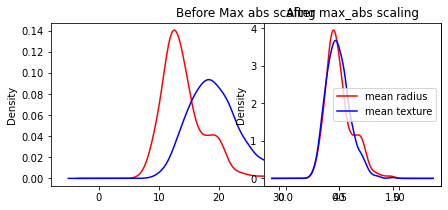

In [49]:
fig = plt.figure(figsize=(7,3))

ax1 = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title('Before Max abs scaling')
df['mean radius'].plot(kind ='kde',ax = ax1, color ='r',legend ='mean radius')
df['mean texture'].plot(kind = 'kde',ax =ax1, color = 'b',legend = 'mean texture')

ax2.set_title('After max_abs scaling')
abs_trans['mean radius'].plot(kind = 'kde',ax =ax2, color = 'r',legend = 'mean radius')
abs_trans['mean texture'].plot(kind ='kde',ax =ax2 , color = 'b',legend ='mean texture')

plt.legend(loc = 0)
plt.show()

## Robust scaling =xi -meadian(x) / 75th quantile(x) - 25th quantile(x)

In [50]:
from sklearn.preprocessing import RobustScaler

In [51]:
rs =  RobustScaler()

In [52]:
rs.fit(df)

RobustScaler()

In [53]:
rs.scale_ ## iqr values

array([4.08, 5.63])

In [55]:
rs.center_ ## meadian values

array([13.37, 18.84])

In [57]:
rs_data = pd.DataFrame(data = rs.transform(df) , columns= df.columns)

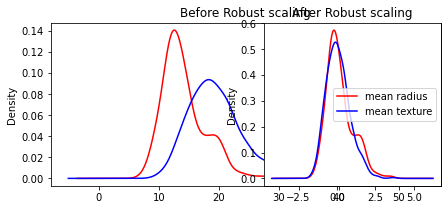

In [58]:
fig = plt.figure(figsize=(7,3))

ax1 = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title('Before Robust scaling')
df['mean radius'].plot(kind ='kde',ax = ax1, color ='r',legend ='mean radius')
df['mean texture'].plot(kind = 'kde',ax =ax1, color = 'b',legend = 'mean texture')

ax2.set_title('After Robust scaling')
rs_data['mean radius'].plot(kind = 'kde',ax =ax2, color = 'r',legend = 'mean radius')
rs_data['mean texture'].plot(kind ='kde',ax =ax2 , color = 'b',legend ='mean texture')

plt.legend(loc = 0)
plt.show()